In [123]:
import pandas as pd
import numpy as np

In [240]:
nltk.download('wordcloud')


[nltk_data] Error loading wordcloud: Package 'wordcloud' not found in
[nltk_data]     index


False

In [125]:
import seaborn as sns
import nltk
import re
from nltk.stem import PorterStemmer,WordNetLemmatizer
from nltk import pos_tag,wordnet
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
#from wordcloud import WordCloud
import matplotlib.pyplot as plt


In [126]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\abhic\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [127]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abhic\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [128]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\abhic\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [129]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abhic\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [130]:
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\abhic\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [131]:
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\abhic\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [132]:
df = pd.read_csv('C:\\Users\\abhic\\OneDrive\\Desktop\\data science\\numpy and pandas\\data science sumit\\data science 3\\47\\Womens Clothing E-Commerce Reviews.csv',index_col=0)


In [133]:
df

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [134]:
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [135]:
df.columns

Index(['Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

# EDA

In [136]:
df['Division Name'].unique()


array(['Initmates', 'General', 'General Petite', nan], dtype=object)

In [137]:
df['Department Name'].unique()


array(['Intimate', 'Dresses', 'Bottoms', 'Tops', 'Jackets', 'Trend', nan],
      dtype=object)

In [138]:
df.isnull().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [139]:
len(df)


23486

In [140]:
845/23486


0.035978881035510515

# handling null value

In [141]:
df_review = df.copy()
df_review.dropna(axis=0,inplace=True)

In [142]:
df_review

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [143]:
len(df_review)


19662

In [144]:
df.describe()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,918.118709,43.198544,4.196032,0.822362,2.535936
std,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,4.000000,1.000000,0.000000
50%,936.000000,41.000000,5.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


In [145]:
df_review.dtypes


Clothing ID                 int64
Age                         int64
Title                      object
Review Text                object
Rating                      int64
Recommended IND             int64
Positive Feedback Count     int64
Division Name              object
Department Name            object
Class Name                 object
dtype: object

In [146]:
df_review['Clothing ID'].nunique()


1095

In [147]:
df_review.head()


,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits


In [148]:
df_review.shape


(19662, 10)

In [149]:
df.shape

(23486, 10)

In [150]:

famous_cloth_id= df_review['Clothing ID'].value_counts()

In [151]:
famous_cloth_id

1078    871
862     658
1094    651
1081    487
829     452
       ... 
201       1
1200      1
525       1
1127      1
522       1
Name: Clothing ID, Length: 1095, dtype: int64

In [152]:
famous_cloth_id[famous_cloth_id>100]

1078    871
862     658
1094    651
1081    487
829     452
872     450
1110    419
868     370
895     336
867     291
936     289
1095    287
850     280
1077    251
1059    247
863     243
1086    241
1080    241
860     237
1083    214
861     203
873     197
1033    190
927     187
1092    187
828     181
1056    180
820     177
836     172
1022    172
1072    166
1008    163
1104    147
984     144
831     138
1020    133
877     133
833     132
854     130
864     125
834     125
835     121
1082    119
1099    115
1035    115
940     113
1087    109
865     108
907     106
909     102
875     101
Name: Clothing ID, dtype: int64

In [153]:
len(famous_cloth_id[famous_cloth_id>100])

51

In [154]:
df_review

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses


In [155]:
bins=np.arange(0,100,10)

In [156]:
bins

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [157]:
df_review['Age group'] = pd.cut(df_review['Age'],bins)


In [158]:
df_review

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Age group
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,"(50, 60]"
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"(40, 50]"
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,"(40, 50]"
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,"(40, 50]"
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,"(30, 40]"
...,...,...,...,...,...,...,...,...,...,...,...
23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses,"(30, 40]"
23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits,"(40, 50]"
23483,1104,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses,"(30, 40]"
23484,1084,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses,"(20, 30]"


# Plotting

In [159]:

#ratings_count_df = df_review.groupby(['Rating',df_review['Age group']]).size().reset_index(name='n')


In [160]:
rating_count_df=df_review.groupby(['Rating',df_review['Age group']]).size().reset_index(name='n')

In [161]:
ratings_count_df

,Rating,Age group,n
0,1,"(0, 10]",0
1,1,"(10, 20]",4
2,1,"(20, 30]",97
3,1,"(30, 40]",229
4,1,"(40, 50]",170
5,1,"(50, 60]",121
6,1,"(60, 70]",60
7,1,"(70, 80]",8
8,1,"(80, 90]",1
9,2,"(0, 10]",0


In [162]:
rating_pivot=pd.pivot_table(rating_count_df,index=['Age group'],values=['n'],columns=['Rating'],aggfunc=[np.sum])

In [163]:
rating_pivot

sum                      
             n                      
Rating       1    2    3     4     5
Age group                           
(0, 10]      0    0    0     0     0
(10, 20]     4    3   15    31    70
(20, 30]    97  182  375   569  1460
(30, 40]   229  488  856  1460  3493
(40, 50]   170  372  645  1138  2693
(50, 60]   121  206  365   692  1886
(60, 70]    60   86  179   349  1048
(70, 80]     8   18   24    43   145
(80, 90]     1    4    4     6    59

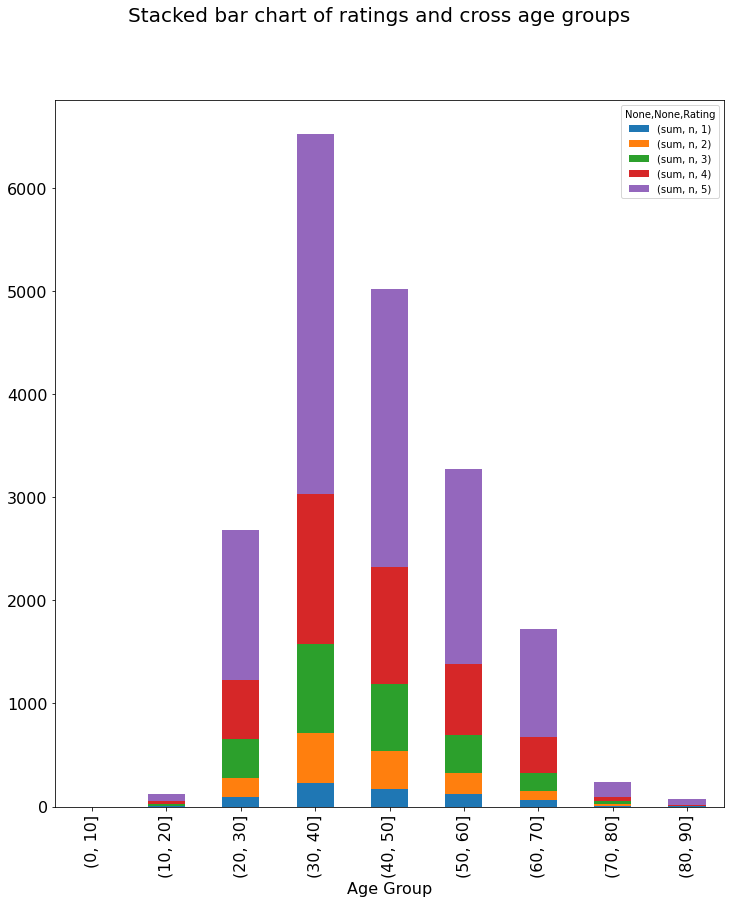

In [164]:
fig=plt.figure(figsize=(12,13))
ax=fig.add_subplot(111)
rating_pivot.plot(kind='bar',stacked=True,fontsize=16,ax=ax)
ax.set_xlabel("Age Group",fontsize=16)
fig.suptitle("Stacked bar chart of ratings and cross age groups",fontsize=20)
plt.show()


In [165]:
import re

In [166]:
stopwords.words()


['إذ',
 'إذا',
 'إذما',
 'إذن',
 'أف',
 'أقل',
 'أكثر',
 'ألا',
 'إلا',
 'التي',
 'الذي',
 'الذين',
 'اللاتي',
 'اللائي',
 'اللتان',
 'اللتيا',
 'اللتين',
 'اللذان',
 'اللذين',
 'اللواتي',
 'إلى',
 'إليك',
 'إليكم',
 'إليكما',
 'إليكن',
 'أم',
 'أما',
 'أما',
 'إما',
 'أن',
 'إن',
 'إنا',
 'أنا',
 'أنت',
 'أنتم',
 'أنتما',
 'أنتن',
 'إنما',
 'إنه',
 'أنى',
 'أنى',
 'آه',
 'آها',
 'أو',
 'أولاء',
 'أولئك',
 'أوه',
 'آي',
 'أي',
 'أيها',
 'إي',
 'أين',
 'أين',
 'أينما',
 'إيه',
 'بخ',
 'بس',
 'بعد',
 'بعض',
 'بك',
 'بكم',
 'بكم',
 'بكما',
 'بكن',
 'بل',
 'بلى',
 'بما',
 'بماذا',
 'بمن',
 'بنا',
 'به',
 'بها',
 'بهم',
 'بهما',
 'بهن',
 'بي',
 'بين',
 'بيد',
 'تلك',
 'تلكم',
 'تلكما',
 'ته',
 'تي',
 'تين',
 'تينك',
 'ثم',
 'ثمة',
 'حاشا',
 'حبذا',
 'حتى',
 'حيث',
 'حيثما',
 'حين',
 'خلا',
 'دون',
 'ذا',
 'ذات',
 'ذاك',
 'ذان',
 'ذانك',
 'ذلك',
 'ذلكم',
 'ذلكما',
 'ذلكن',
 'ذه',
 'ذو',
 'ذوا',
 'ذواتا',
 'ذواتي',
 'ذي',
 'ذين',
 'ذينك',
 'ريث',
 'سوف',
 'سوى',
 'شتان',
 'عدا',
 'عسى',
 'عل'


# Text normalisation on Review Text


In [167]:
def clean_string(s):
    r1=re.sub('[^A-Za-z]+',' ',str(s))
    r1=r1.strip().lower()
    # removing stopword
    no_stp_wrd=[]
    if r1 not in stopwords.words():
        no_stp_wrd.append(r1)
    
    #performing stemming
    stemmer= PorterStemmer()
    final_list=[]
    
    for i in no_stp_wrd:
        final_list.append(stemmer.stem(str(i)))
    return final_list

In [168]:
review_df=df_review.copy()

In [169]:
review_df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Age group
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,"(50, 60]"
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"(40, 50]"
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,"(40, 50]"
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,"(40, 50]"
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,"(30, 40]"


In [170]:
review_df = review_df[['Clothing ID','Review Text','Age group','Recommended IND']]
review_df


,Clothing ID,Review Text,Age group,Recommended IND
2,1077,I had such high hopes for this dress and reall...,"(50, 60]",0
3,1049,"I love, love, love this jumpsuit. it's fun, fl...","(40, 50]",1
4,847,This shirt is very flattering to all due to th...,"(40, 50]",1
5,1080,"I love tracy reese dresses, but this one is no...","(40, 50]",0
6,858,I aded this in my basket at hte last mintue to...,"(30, 40]",1
...,...,...,...,...
23481,1104,I was very happy to snag this dress at such a ...,"(30, 40]",1
23482,862,"It reminds me of maternity clothes. soft, stre...","(40, 50]",1
23483,1104,"This fit well, but the top was very see throug...","(30, 40]",0
23484,1084,I bought this dress for a wedding i have this ...,"(20, 30]",1


In [171]:
review_df['filter_review']=review_df['Review Text'].apply(clean_string)

In [172]:
review_df

,Clothing ID,Review Text,Age group,Recommended IND,filter_review
2,1077,I had such high hopes for this dress and reall...,"(50, 60]",0,[i had such high hopes for this dress and real...
3,1049,"I love, love, love this jumpsuit. it's fun, fl...","(40, 50]",1,[i love love love this jumpsuit it s fun flirt...
4,847,This shirt is very flattering to all due to th...,"(40, 50]",1,[this shirt is very flattering to all due to t...
5,1080,"I love tracy reese dresses, but this one is no...","(40, 50]",0,[i love tracy reese dresses but this one is no...
6,858,I aded this in my basket at hte last mintue to...,"(30, 40]",1,[i aded this in my basket at hte last mintue t...
...,...,...,...,...,...
23481,1104,I was very happy to snag this dress at such a ...,"(30, 40]",1,[i was very happy to snag this dress at such a...
23482,862,"It reminds me of maternity clothes. soft, stre...","(40, 50]",1,[it reminds me of maternity clothes soft stret...
23483,1104,"This fit well, but the top was very see throug...","(30, 40]",0,[this fit well but the top was very see throug...
23484,1084,I bought this dress for a wedding i have this ...,"(20, 30]",1,[i bought this dress for a wedding i have this...


In [174]:
review_df['filter_review']

2        [i had such high hopes for this dress and real...
3        [i love love love this jumpsuit it s fun flirt...
4        [this shirt is very flattering to all due to t...
5        [i love tracy reese dresses but this one is no...
6        [i aded this in my basket at hte last mintue t...
                               ...                        
23481    [i was very happy to snag this dress at such a...
23482    [it reminds me of maternity clothes soft stret...
23483    [this fit well but the top was very see throug...
23484    [i bought this dress for a wedding i have this...
23485    [this dress in a lovely platinum is feminine a...
Name: filter_review, Length: 19662, dtype: object

In [177]:
review_df['Review Text']

2        I had such high hopes for this dress and reall...
3        I love, love, love this jumpsuit. it's fun, fl...
4        This shirt is very flattering to all due to th...
5        I love tracy reese dresses, but this one is no...
6        I aded this in my basket at hte last mintue to...
                               ...                        
23481    I was very happy to snag this dress at such a ...
23482    It reminds me of maternity clothes. soft, stre...
23483    This fit well, but the top was very see throug...
23484    I bought this dress for a wedding i have this ...
23485    This dress in a lovely platinum is feminine an...
Name: Review Text, Length: 19662, dtype: object

In [179]:
review_df.head()

,Clothing ID,Review Text,Age group,Recommended IND,filter_review
2,1077,I had such high hopes for this dress and reall...,"(50, 60]",0,[i had such high hopes for this dress and real...
3,1049,"I love, love, love this jumpsuit. it's fun, fl...","(40, 50]",1,[i love love love this jumpsuit it s fun flirt...
4,847,This shirt is very flattering to all due to th...,"(40, 50]",1,[this shirt is very flattering to all due to t...
5,1080,"I love tracy reese dresses, but this one is no...","(40, 50]",0,[i love tracy reese dresses but this one is no...
6,858,I aded this in my basket at hte last mintue to...,"(30, 40]",1,[i aded this in my basket at hte last mintue t...


# Sentiment Analysis on Filtered Review column


In [181]:
sia = SentimentIntensityAnalyzer()


In [184]:
num_records = review_df.shape[0]


In [186]:
num_records

19662

In [191]:
ones_array = np.ones(num_records)
ones_array


array([1., 1., 1., ..., 1., 1., 1.])

In [194]:
review_df['Compound Score'] = ones_array


In [197]:
review_df.head()


,Clothing ID,Review Text,Age group,Recommended IND,filter_review,Compound Score
2,1077,I had such high hopes for this dress and reall...,"(50, 60]",0,[i had such high hopes for this dress and real...,1.0
3,1049,"I love, love, love this jumpsuit. it's fun, fl...","(40, 50]",1,[i love love love this jumpsuit it s fun flirt...,1.0
4,847,This shirt is very flattering to all due to th...,"(40, 50]",1,[this shirt is very flattering to all due to t...,1.0
5,1080,"I love tracy reese dresses, but this one is no...","(40, 50]",0,[i love tracy reese dresses but this one is no...,1.0
6,858,I aded this in my basket at hte last mintue to...,"(30, 40]",1,[i aded this in my basket at hte last mintue t...,1.0


In [201]:
review_df['filter_review']


2        [i had such high hopes for this dress and real...
3        [i love love love this jumpsuit it s fun flirt...
4        [this shirt is very flattering to all due to t...
5        [i love tracy reese dresses but this one is no...
6        [i aded this in my basket at hte last mintue t...
                               ...                        
23481    [i was very happy to snag this dress at such a...
23482    [it reminds me of maternity clothes soft stret...
23483    [this fit well but the top was very see throug...
23484    [i bought this dress for a wedding i have this...
23485    [this dress in a lovely platinum is feminine a...
Name: filter_review, Length: 19662, dtype: object

In [206]:
len(review_df['filter_review'])


19662

In [210]:
for i in range(len(review_df['filter_review'])):
    element=review_df['filter_review'].iloc[i][0]
    #print(element)
    #break
    score=sia.polarity_scores(element)
   # print(score)
    compound=score['compound']
    review_df['Compound Score'].iloc[i]=compound

C:\Users\abhic\AppData\Local\Temp\ipykernel_2708\3883027602.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review_df['Compound Score'].iloc[i]=compound


In [215]:
review_df

,Clothing ID,Review Text,Age group,Recommended IND,filter_review,Compound Score
2,1077,I had such high hopes for this dress and reall...,"(50, 60]",0,[i had such high hopes for this dress and real...,0.9398
3,1049,"I love, love, love this jumpsuit. it's fun, fl...","(40, 50]",1,[i love love love this jumpsuit it s fun flirt...,0.7192
4,847,This shirt is very flattering to all due to th...,"(40, 50]",1,[this shirt is very flattering to all due to t...,0.9162
5,1080,"I love tracy reese dresses, but this one is no...","(40, 50]",0,[i love tracy reese dresses but this one is no...,0.9419
6,858,I aded this in my basket at hte last mintue to...,"(30, 40]",1,[i aded this in my basket at hte last mintue t...,0.4576
...,...,...,...,...,...,...
23481,1104,I was very happy to snag this dress at such a ...,"(30, 40]",1,[i was very happy to snag this dress at such a...,0.9100
23482,862,"It reminds me of maternity clothes. soft, stre...","(40, 50]",1,[it reminds me of maternity clothes soft stret...,0.6652
23483,1104,"This fit well, but the top was very see throug...","(30, 40]",0,[this fit well but the top was very see throug...,0.9343
23484,1084,I bought this dress for a wedding i have this ...,"(20, 30]",1,[i bought this dress for a wedding i have this...,0.8198


In [ ]:
category = []
for i in reviews_df['Compound Score']:
 if i > 0:
 category.append("Positive")
 elif i < 0:
 category.append("Negative")
 else:
 category.append("Neutral")
 
reviews_df['Sentiment_Category'] = category


In [218]:
category=[]
for i in review_df['Compound Score']:
    if i > 0:
        category.append('postive')
    elif i <0:
        category.append('negative')
    else:
        category.append('natural')
review_df['Sentiment_Category']=category
        
            
        

In [220]:
review_df

,Clothing ID,Review Text,Age group,Recommended IND,filter_review,Compound Score,Sentiment_Category
2,1077,I had such high hopes for this dress and reall...,"(50, 60]",0,[i had such high hopes for this dress and real...,0.9398,postive
3,1049,"I love, love, love this jumpsuit. it's fun, fl...","(40, 50]",1,[i love love love this jumpsuit it s fun flirt...,0.7192,postive
4,847,This shirt is very flattering to all due to th...,"(40, 50]",1,[this shirt is very flattering to all due to t...,0.9162,postive
5,1080,"I love tracy reese dresses, but this one is no...","(40, 50]",0,[i love tracy reese dresses but this one is no...,0.9419,postive
6,858,I aded this in my basket at hte last mintue to...,"(30, 40]",1,[i aded this in my basket at hte last mintue t...,0.4576,postive
...,...,...,...,...,...,...,...
23481,1104,I was very happy to snag this dress at such a ...,"(30, 40]",1,[i was very happy to snag this dress at such a...,0.9100,postive
23482,862,"It reminds me of maternity clothes. soft, stre...","(40, 50]",1,[it reminds me of maternity clothes soft stret...,0.6652,postive
23483,1104,"This fit well, but the top was very see throug...","(30, 40]",0,[this fit well but the top was very see throug...,0.9343,postive
23484,1084,I bought this dress for a wedding i have this ...,"(20, 30]",1,[i bought this dress for a wedding i have this...,0.8198,postive


In [224]:
 review_df.iloc[100:200]


,Clothing ID,Review Text,Age group,Recommended IND,filter_review,Compound Score,Sentiment_Category
132,861,In my retailer this was hung over in the pj se...,"(40, 50]",1,[in my retailer this was hung over in the pj s...,0.9675,postive
133,966,I love this vest! there are so many ways to st...,"(30, 40]",1,[i love this vest there are so many ways to st...,0.8720,postive
134,845,This blouse is a perfect creation: perfect-wei...,"(60, 70]",1,[this blouse is a perfect creation perfect wei...,0.9725,postive
136,966,Love this vest! the color looks a little more ...,"(30, 40]",1,[love this vest the color looks a little more ...,0.9791,postive
137,836,I received the sky color in m online. am defi...,"(50, 60]",1,[i received the sky color in m online am defin...,0.9623,postive
...,...,...,...,...,...,...,...
250,1026,I love these pants. i have worn them a number ...,"(40, 50]",1,[i love these pants i have worn them a number ...,0.6826,postive
251,840,I love this tunic the natural color is just th...,"(30, 40]",1,[i love this tunic the natural color is just t...,0.9401,postive
252,1066,These cropped pants are very light weight and ...,"(20, 30]",1,[these cropped pants are very light weight and...,0.7845,postive
253,647,I have this dress on today in white and i am c...,"(30, 40]",1,[i have this dress on today in white and i am ...,-0.0209,negative


In [226]:
# calcualting the total of positive, negative and neutral sentiments


In [229]:
sentiment_df = review_df.copy()


In [231]:
sentiment_df.columns

Index(['Clothing ID', 'Review Text', 'Age group', 'Recommended IND',
       'filter_review', 'Compound Score', 'Sentiment_Category'],
      dtype='object')

In [233]:
sentiment_df = sentiment_df[['Clothing ID','Sentiment_Category']]


In [235]:
sentiment_df_agg = sentiment_df.groupby('Sentiment_Category').size().reset_index(name='No of Sentiments')


In [237]:
sentiment_df_agg

,Sentiment_Category,No of Sentiments
0,natural,121
1,negative,1094
2,postive,18447


# fig,ax = plt.subplots()
sentiment_df_agg.plot(kind='bar',x='Sentiment_Category',y='No of Sentiments',figsize=(6,8),fontsize=20,ax=ax)
fig.suptitle('Number of Sentiments Category',fontsize=14)


# There are huge amoount of positive reviews which we have figured out in the above process, We can find the list of all such words which shows the positive sentiments of the user for their
purchase.



# Applying Naive Bayes Classification Algorithm


In [257]:
review_df

,Clothing ID,Review Text,Age group,Recommended IND,filter_review,Compound Score,Sentiment_Category
2,1077,I had such high hopes for this dress and reall...,"(50, 60]",0,[i had such high hopes for this dress and real...,0.9398,postive
3,1049,"I love, love, love this jumpsuit. it's fun, fl...","(40, 50]",1,[i love love love this jumpsuit it s fun flirt...,0.7192,postive
4,847,This shirt is very flattering to all due to th...,"(40, 50]",1,[this shirt is very flattering to all due to t...,0.9162,postive
5,1080,"I love tracy reese dresses, but this one is no...","(40, 50]",0,[i love tracy reese dresses but this one is no...,0.9419,postive
6,858,I aded this in my basket at hte last mintue to...,"(30, 40]",1,[i aded this in my basket at hte last mintue t...,0.4576,postive
...,...,...,...,...,...,...,...
23481,1104,I was very happy to snag this dress at such a ...,"(30, 40]",1,[i was very happy to snag this dress at such a...,0.9100,postive
23482,862,"It reminds me of maternity clothes. soft, stre...","(40, 50]",1,[it reminds me of maternity clothes soft stret...,0.6652,postive
23483,1104,"This fit well, but the top was very see throug...","(30, 40]",0,[this fit well but the top was very see throug...,0.9343,postive
23484,1084,I bought this dress for a wedding i have this ...,"(20, 30]",1,[i bought this dress for a wedding i have this...,0.8198,postive


In [260]:
X = review_df['Sentiment_Category']
y = review_df['Recommended IND']

In [262]:
from sklearn.model_selection import train_test_split


In [263]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)


In [266]:
count_vect = CountVectorizer()
tfidf_tfm = TfidfTransformer()
train_df_counts = count_vect.fit_transform(X_train)
train_df_tfidf = tfidf_tfm.fit_transform(train_df_counts)


In [268]:
clf = MultinomialNB().fit(train_df_tfidf,y_train)


In [276]:
count_test_vect=count_vect.transform(X_test)
y_pred=clf.predict(count_test_vect)
y_pred


array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [279]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 176,  707],
       [ 101, 3932]], dtype=int64)

In [281]:
print("True Negative",cm[0][0])
print("True Positive",cm[1][1])
print("False Negative",cm[0][1])
print("Total",sum(sum(cm)))
print('Accuracy',(cm[0][0]+cm[1][1])/sum(sum(cm)))


True Negative 176
True Positive 3932
False Negative 707
Total 4916
Accuracy 0.8356387306753458
